In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('./ex2data1.txt', header=None, names=['exam1', 'exam2', 'Admited'])
data

,exam1,exam2,Admited
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [13]:
positive = data[data['Admited']==1]
negavite = data[data['Admited']==0]
positive

,exam1,exam2,Admited
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


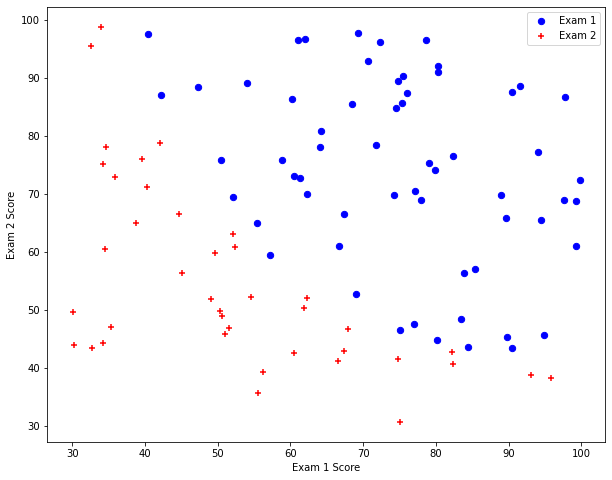

In [28]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot()
ax.scatter(positive['exam1'], positive['exam2'], marker='o', color='b', s=40, label='Exam 1')
ax.scatter(negavite['exam1'], negavite['exam2'], marker='+', color='r', s=40, label='Exam 2')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

# 1.2.1 segmoid function

In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 1.2.2 Cost function and gradient

In [32]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1-y), np.log(1- sigmoid(X * theta.T)))
    return np.sum((first-second)/len(X))


In [34]:
data.insert(0, 'Ones', 1)


In [57]:
# 初始化X，y，θ
cols = data.shape[1]
X = data.loc[:, 'Ones':'exam2']
y = data[['Admited']]
theta = np.zeros(3)

# 转换X，y的类型
X = np.array(X.values)
y = np.array(y.values)

In [58]:
print(X.shape, theta.shape, y.shape)

(100, 3) (3,) (100, 1)


In [75]:
cost(theta, X, y)

0.6931471805599457

In [74]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [76]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

## 1.2.3 fminunc

In [95]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [89]:
cost(result[0], X, y)

0.20349770158947422

## 1.2.4 Evaluating logistic regression

In [90]:
# 在确定参数之后，我们可以使用这个模型来预测学生是否录取。如果一个学生exam1得分45，exam2得分85，那么他录取的概率应为0.776
def hfunc1(theta, X):
    return sigmoid(np.dot(theta.T, X))
hfunc1(result[0],[1,45,85])

0.776290625526598

In [91]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [92]:
# 统计预测正确率
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


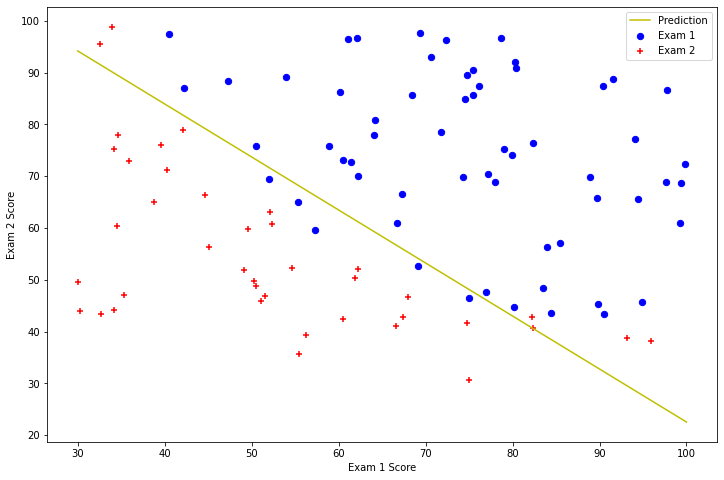

In [93]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax=plt.subplot()
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['exam1'], positive['exam2'], marker='o', color='b', s=40, label='Exam 1')
ax.scatter(negavite['exam1'], negavite['exam2'], marker='+', color='r', s=40, label='Exam 2')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

# 2 Regularized logistic regression

In [8]:
data2 = pd.read_csv('./ex2data2.txt', header=None, names=['Test1', 'Test2', 'Accepted'])
data2

,Test1,Test2,Accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [9]:
positive = data2[data2['Accepted']==1]
negavite = data2[data2['Accepted']==0]
positive

,Test1,Test2,Accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


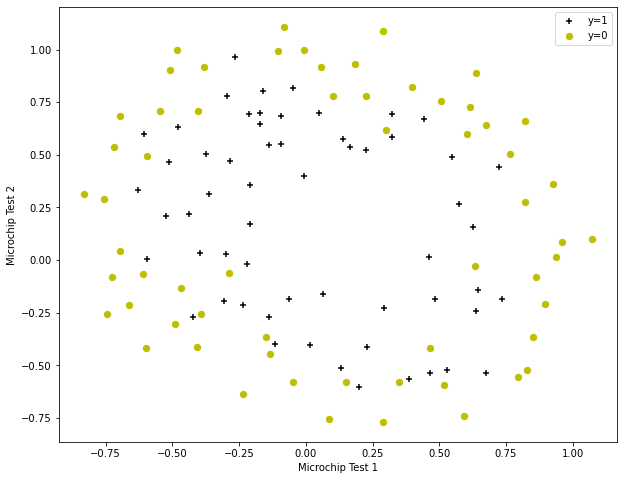

In [10]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot()
ax.scatter(positive['Test1'], positive['Test2'], marker='+', color='black', s=40, label='y=1')
ax.scatter(negavite['Test1'], negavite['Test2'], marker='o', color='y', s=40, label='y=0')
ax.legend()
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
plt.show()

In [13]:
data2.insert(3, 'Ones', 1)

In [14]:
data2

,Test1,Test2,Accepted,Ones
0,0.051267,0.699560,1,1
1,-0.092742,0.684940,1,1
2,-0.213710,0.692250,1,1
3,-0.375000,0.502190,1,1
4,-0.513250,0.465640,1,1
...,...,...,...,...
113,-0.720620,0.538740,0,1
114,-0.593890,0.494880,0,1
115,-0.484450,0.999270,0,1
116,-0.006336,0.999270,0,1
